<a href="https://colab.research.google.com/github/brianjmalone/SDS-CP031-myconet/blob/main/SDS_myconet_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Myconet Project

### Data Loading

In [ ]:
# input Kaggle credentials
from google.colab import userdata
import os
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [ ]:
# installation (already satisfied)
# !pip install kaggle
# !kaggle --version

# download data
!kaggle datasets download -d joebeachcapital/defungi
!unzip defungi.zip

Streaming output truncated to the last 5000 lines.
  inflating: H1/H1_94a_2.jpg         
  inflating: H1/H1_94a_3.jpg         
  inflating: H1/H1_94a_4.jpg         
  inflating: H1/H1_94a_5.jpg         
  inflating: H1/H1_94a_6.jpg         
  inflating: H1/H1_94a_7.jpg         
  inflating: H1/H1_94a_8.jpg         
  inflating: H1/H1_94a_9.jpg         
  inflating: H1/H1_94b_1.jpg         
  inflating: H1/H1_94b_2.jpg         
  inflating: H1/H1_94b_3.jpg         
  inflating: H1/H1_94b_4.jpg         
  inflating: H1/H1_94b_5.jpg         
  inflating: H1/H1_94b_6.jpg         
  inflating: H1/H1_94b_7.jpg         
  inflating: H1/H1_94b_8.jpg         
  inflating: H1/H1_94b_9.jpg         
  inflating: H1/H1_95a_1.jpg         
  inflating: H1/H1_95a_10.jpg        
  inflating: H1/H1_95a_11.jpg        
  inflating: H1/H1_95a_12.jpg        
  inflating: H1/H1_95a_13.jpg        
  inflating: H1/H1_95a_14.jpg        
  inflating: H1/H1_95a_15.jpg        
  inflating: H1/H1_95a_16.jpg        

### Explore data directory structure (bash)

In [ ]:
# explore directory structure...
!ls -l

total 152980
-rw-r--r-- 1 root root 156341364 Oct 19  2023 defungi.zip
drwxr-xr-x 2 root root    135168 Jun 28 00:13 H1
drwxr-xr-x 2 root root     69632 Jun 28 00:13 H2
drwxr-xr-x 2 root root     28672 Jun 28 00:13 H3
drwxr-xr-x 2 root root     32768 Jun 28 00:13 H5
drwxr-xr-x 2 root root     20480 Jun 28 00:13 H6
drwxr-xr-x 1 root root      4096 Jun 26 13:35 sample_data


In [ ]:
# !apt install tree
# !tree -L 1

In [ ]:
# !find . -type f | cut -d/ -f2 | sort | uniq -c
# !find . -name "*.jpg" | cut -d/ -f2 | sort | uniq -c
# !find . -mindepth 1 -type d -exec sh -c 'echo "$(find "$1" -type f | wc -l) files in $1"' _ {} \;

###  Mount drive and verify download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content'))
root_path = '/content/'

['.config', 'H5', 'H3', 'H1', 'H2', 'defungi.zip', 'H6', 'drive', 'sample_data']


### Install/Import Libraries

In [ ]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 21.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil, sqrt

import time

import cv2
import os
from glob import glob
from tqdm import tqdm
import shutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import mlflow

In [ ]:
# pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models
from torchvision.datasets import ImageFolder
! pip install torchsummary
import torchsummary

from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets, models, transforms, utils
from torchvision.transforms import v2

## Label image classes (annoying AF)

In [ ]:
root_path = '/content/'
all_data = []

# Get only H-folders
h_folders = [f for f in os.listdir(root_path) if f.startswith('H')]
h_folders.sort()

label_dict = {label: i for i, label in enumerate(h_folders)}
print(f"H-folders found: {label_dict}")

for label in h_folders:
    jpg_files = glob(os.path.join(root_path, label, '*.jpg'))
    class_id = label_dict[label]
    for jpg_path in jpg_files:
        all_data.append({"path": jpg_path, "label": label, "class_id": class_id})

df = pd.DataFrame(all_data)
print(f"Classes: {df['class_id'].unique()}")
df.info()

H-folders found: {'H1': 0, 'H2': 1, 'H3': 2, 'H5': 3, 'H6': 4}
Classes: [0 1 2 3 4]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9114 entries, 0 to 9113
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      9114 non-null   object
 1   label     9114 non-null   object
 2   class_id  9114 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 213.7+ KB


In [ ]:
df.head()

,path,label,class_id
0,/content/H1/H1_109a_27.jpg,H1,0
1,/content/H1/H1_14a_1.jpg,H1,0
2,/content/H1/H1_5c_13.jpg,H1,0
3,/content/H1/H1_1d_12.jpg,H1,0
4,/content/H1/H1_24b_17.jpg,H1,0


### Rebalance class weights

In [ ]:
# Usage...
class_counts = get_class_distribution(df)
weights = calculate_balanced_class_weights(class_counts)
class_weights_tensor = weights_to_tensor(weights)

# Print summary
print_class_info(class_counts, weights)
print(f"Device: {class_weights_tensor.device}")

Dataset: 9,114 samples, 5 classes
Class distribution:
  Class 0: 4,404 samples (48.3%), weight: 0.4139
  Class 1: 2,334 samples (25.6%), weight: 0.7810
  Class 2: 819 samples (9.0%), weight: 2.2256
  Class 3: 818 samples (9.0%), weight: 2.2284
  Class 4: 739 samples (8.1%), weight: 2.4666
Device: cuda:0


## Bar plot of image classes

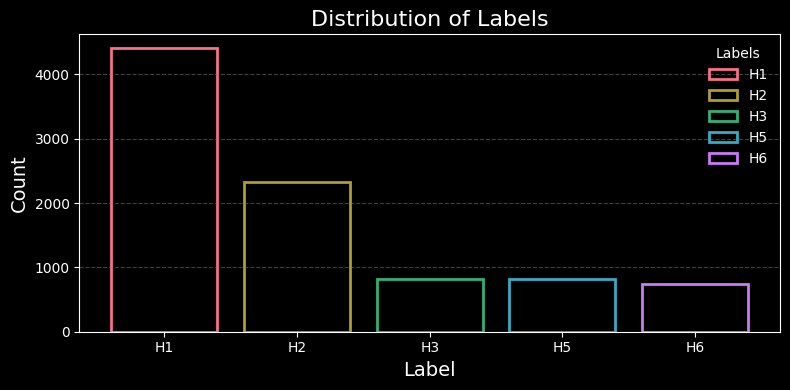

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('dark_background')

label_counts = df['label'].value_counts().sort_index()
labels = label_counts.index
counts = label_counts.values

colors = sns.color_palette('husl', n_colors=len(labels))
fig, ax = plt.subplots(figsize=(8, 4))

for i, (label, count) in enumerate(zip(labels, counts)):
    ax.bar(label, count,
           color='none',
           edgecolor=colors[i],
           linewidth=2,
           label=label)

ax.set_title('Distribution of Labels', color='white', fontsize=16)
ax.set_xlabel('Label', color='white', fontsize=14)
ax.set_ylabel('Count', color='white', fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(axis='y', linestyle='--', alpha=0.5, color='gray')
ax.legend(title="Labels", frameon=False, labelcolor='white')

plt.tight_layout()
plt.show()

### Helper Functions (classes and weighting)

In [ ]:
def calculate_balanced_class_weights(class_counts):
    """
    Calculate balanced class weights from class counts.
    Returns: Class weights as numpy array
    """
    n_samples = class_counts.sum()
    n_classes = len(class_counts)

    # Calculate balanced weights: n_samples / (n_classes * class_count)
    weights = n_samples / (n_classes * class_counts.values)

    return weights

In [ ]:
def get_class_distribution(df, class_column='class_id'):
    """
    Get class distribution from DataFrame.

    Args:
        df: DataFrame containing the data
        class_column: Name of the column containing class labels

    Returns: pandas.Series: Class counts sorted by class index
    """
    if class_column not in df.columns:
        raise ValueError(f"Column '{class_column}' not found in DataFrame")

    return df[class_column].value_counts().sort_index()

In [ ]:
def weights_to_tensor(weights, device=None):
    """
    Convert class weights to PyTorch tensor on specified device.

    Args:
        weights: numpy array of class weights
        device: torch device or None for auto-detection

    Returns:
        torch.Tensor: Class weights tensor on appropriate device
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    return torch.tensor(weights, dtype=torch.float32).to(device)


In [ ]:
def print_class_info(class_counts, weights=None):
    """
    Print class distribution and weights information.

    Args:
        class_counts: pandas Series with class counts
        weights: numpy array of class weights (optional)
    """
    n_samples = class_counts.sum()
    n_classes = len(class_counts)

    print(f"Dataset: {n_samples:,} samples, {n_classes} classes")
    print("Class distribution:")

    for class_id, count in class_counts.items():
        percentage = count / n_samples * 100
        weight_str = ""
        if weights is not None:
            weight = weights[class_counts.index.get_loc(class_id)]
            weight_str = f", weight: {weight:.4f}"
        print(f"  Class {class_id}: {count:,} samples ({percentage:.1f}%){weight_str}")

In [ ]:
def show_sample_images(df, n_images=15, cols=5):
    """Display random sample images in a grid."""
    rows = (n_images + cols - 1) // cols  # Ceiling division

    indices = np.random.choice(len(df), n_images, replace=False)

    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.flatten()

    for i in range(n_images):
        idx = indices[i]
        img_path = df.iloc[idx]['path']
        label = df.iloc[idx]['label']

        axes[i].imshow(plt.imread(img_path))
        axes[i].set_title(label)
        axes[i].axis('off')

    # Hide unused subplots
    for i in range(n_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()

## Display sample images from dataset

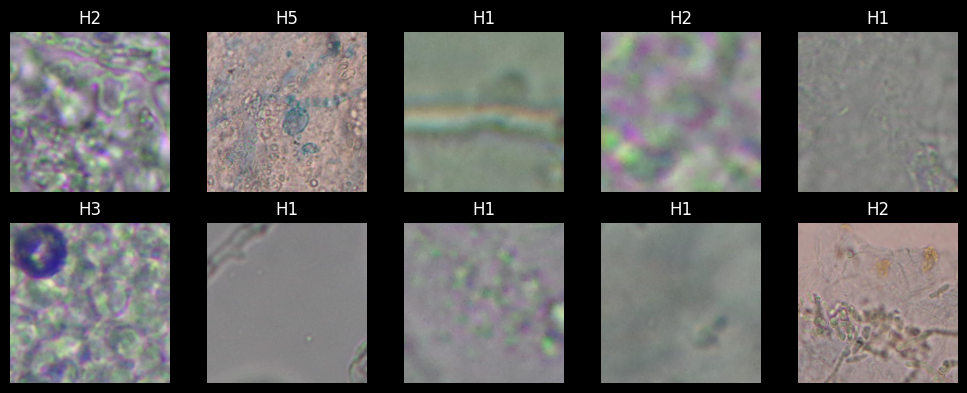

In [ ]:
show_sample_images(df, n_images=10)

## Data augmentation and image preprocessing

In [ ]:
# Core preprocessing (same for all splits)
base_preprocessing = [
    v2.PILToTensor(),
    v2.ToDtype(torch.float32),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]

# Augmentation operations (train only)
augmentation_ops = [
    v2.Resize(256),
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.5),
    v2.RandomAffine(degrees=(-10, 10), translate=(0.1, 0.1), scale=(0.9, 1.1)),
    v2.RandomErasing(p=0.5, scale=(0.1, 0.15))
]

# Eval/test preprocessing (deterministic resize)
eval_preprocessing = [v2.Resize((224, 224))]

# Compose transforms
train_transforms = v2.Compose(augmentation_ops + base_preprocessing)
eval_transforms = v2.Compose(eval_preprocessing + base_preprocessing)
test_transforms = eval_transforms  # Same as eval

### Generate a custom Dataset class

In [ ]:
class FungalDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df.iloc[idx]['path']
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        class_id = self.df.iloc[idx]['class_id']
        return image, class_id

### Split dataset into train, test, validation

In [ ]:
# First split: 80% train, 20% val+test
train_df, val_test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=9898,
    stratify=df['label']
)

# Second split: Split the 20% into 10% val, 10% test
val_df, test_df = train_test_split(
    val_test_df,
    test_size=0.5,  # 50% of 20% = 10% of total
    random_state=9898,
    stratify=val_test_df['label']
)

train_dataset = FungalDataset(train_df, transform=train_transforms)
val_dataset = FungalDataset(val_df, transform=eval_transforms)
test_dataset = FungalDataset(test_df, transform=test_transforms)

### Package into batches with DataLoaders

In [ ]:
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

print(f'Length: train data:{len(train_df)}')
print(f'Length: val data:{len(val_df)}')
print(f'Length: test data:{len(test_df)}')

Length: train data:7291
Length: val data:911
Length: test data:912


## Model Definitions

### Weight initialization

In [ ]:
def init_weights(module):
    """Apply He initialization to conv layers and Xavier to linear layers."""

    if isinstance(module, nn.Conv2d):
        # He initialization for ReLU activations
        nn.init.kaiming_normal_(module.weight, mode='fan_out', nonlinearity='relu')
        if module.bias is not None:
            nn.init.constant_(module.bias, 0)

    elif isinstance(module, nn.Linear):
        # Xavier initialization for linear layers
        nn.init.xavier_normal_(module.weight)
        if module.bias is not None:
            nn.init.constant_(module.bias, 0)

    elif isinstance(module, nn.BatchNorm2d):
        # Standard BN initialization
        nn.init.constant_(module.weight, 1)
        nn.init.constant_(module.bias, 0)

### Create simple model (2 layer CNN)

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()

        # Convolutional layers - grouped together
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)

        # Pooling and activation
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        # Fully connected layers
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32 * 56 * 56, num_classes)  # 224/4 = 56 (2 pooling ops)

        # Apply initialization
        self.apply(init_weights)

    def forward(self, x):
        # Conv block 1: 16 filters
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)  # 224x224 -> 112x112

        # Conv block 2: 32 filters
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)  # 112x112 -> 56x56

        # Flatten and output
        x = self.flatten(x)
        x = self.fc(x)

        return x

In [ ]:
model = SimpleCNN(num_classes=5)
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=100352, out_features=5, bias=True)
)


### Create deeper model (4 layer CNN)

In [ ]:
class BespokeCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(BespokeCNN, self).__init__()

        # Convolutional layers - grouped together
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        # Pooling and activation
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        # Fully connected layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 256)  # 224/16 = 14 (4 pooling ops)
        self.fc2 = nn.Linear(256, num_classes)

        # Apply initialization
        self.apply(init_weights)

    def forward(self, x):
        # Conv block 1: 32 filters
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)  # 224x224 -> 112x112

        # Conv block 2: 64 filters
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)  # 112x112 -> 56x56

        # Conv block 3: 128 filters
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)  # 56x56 -> 28x28

        # Conv block 4: 256 filters
        x = self.conv4(x)
        x = self.relu(x)
        x = self.maxpool(x)  # 28x28 -> 14x14

        # Flatten and dense layers
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [ ]:
model = BespokeCNN(num_classes=5)
print(model)

BespokeCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=5, bias=True)
)


### Efficient Net and ResNet

In [ ]:
# Add these two classes to what you have
class EfficientNetClassifier(nn.Module):
    def __init__(self, num_classes=5):
        super().__init__()
        self.backbone = models.efficientnet_b0(weights='IMAGENET1K_V1')
        self.backbone.classifier[1] = nn.Linear(self.backbone.classifier[1].in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)

class ResNetClassifier(nn.Module):
    def __init__(self, num_classes=5):
        super().__init__()
        self.backbone = models.resnet18(weights='IMAGENET1K_V1')
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)

### Model Factory

In [ ]:
def create_model(model_type, num_classes=6):
    """Create model by name."""

    models = {
        'simple_cnn': SimpleCNN,
        'bespoke_cnn': BespokeCNN,
        'efficientnet': EfficientNetClassifier,
        'resnet': ResNetClassifier
    }

    if model_type not in models:
        raise ValueError(f"Unknown model: {model_type}")

    return models[model_type](num_classes)

### Model Configuration

In [ ]:
# ===== CONFIGURATION =====
MODEL_TYPE = 'efficientnet'
NUM_CLASSES = 5
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 50

# Create model
model = create_model(MODEL_TYPE, NUM_CLASSES)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

## Training

Define functions for training and eval

In [ ]:
def run_epoch(dataloader, model, loss_fn, optimizer, device, is_training=True):
    """Train or evaluate model for one epoch."""
    model.train() if is_training else model.eval()

    total_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    epoch_loss = 0.0
    epoch_correct = 0

    context = torch.enable_grad() if is_training else torch.no_grad()
    progress_freq = 50 if is_training else 20

    with context:
        for i, (batch_data, batch_targets) in enumerate(dataloader):
            if i % progress_freq == 0:
                mode = "Training" if is_training else "Validation"
                print(f"  {mode} batch {i+1}/{num_batches}")

            # Move to device
            batch_data = batch_data.to(device)
            batch_targets = batch_targets.to(device, dtype=torch.long)

            # Forward pass
            outputs = model(batch_data)
            loss = loss_fn(outputs, batch_targets)

            # Backward pass (training only)
            if is_training:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Statistics
            epoch_loss += loss.item()
            predictions = outputs.argmax(dim=1)
            epoch_correct += (predictions == batch_targets).sum().item()

    accuracy = epoch_correct / total_samples
    avg_loss = epoch_loss / num_batches
    return accuracy, avg_loss

### Check memory and time demands for training

In [ ]:
def vram_requirement(batch_size, image_channels, image_height, image_width,
                     training_multiplier=3.0, bytes_per_value=4):
    """
    Estimate VRAM requirements for training.

    Args:
        batch_size: Number of images per batch
        image_channels: Number of channels (3 for RGB, 1 for grayscale)
        image_height: Image height in pixels
        image_width: Image width in pixels
        training_multiplier: Memory multiplier for forward+backward+optimizer (default: 3.0)
        bytes_per_value: Bytes per pixel value (4 for float32, 2 for float16)

    Returns:
        Dictionary with memory estimates in MB and GB
    """
    # Calculate memory for one batch
    batch_memory_bytes = batch_size * image_channels * image_height * image_width * bytes_per_value
    batch_memory_mb = batch_memory_bytes / 1e6

    # Estimate total training memory
    # (includes gradients, optimizer state, activations)
    training_memory_bytes = batch_memory_bytes * training_multiplier
    training_memory_mb = training_memory_bytes / 1e6
    training_memory_gb = training_memory_bytes / 1e9

    # Display results
    print(f"VRAM Requirements:")
    print(f"  Batch size: {batch_size}")
    print(f"  Image shape: {image_channels} × {image_height} × {image_width}")
    print(f"  Precision: {'float32' if bytes_per_value == 4 else 'float16'}")
    print(f"")
    print(f"  Batch memory: {batch_memory_mb:.1f} MB")
    print(f"  Estimated training memory: {training_memory_mb:.1f} MB ({training_memory_gb:.2f} GB)")
    print(f"")

    # Check against common GPU memory sizes
    gpu_sizes = {'T4': 16, 'V100': 32, 'A100': 40, 'RTX 4090': 24}
    print(f"  GPU compatibility:")
    for gpu, memory_gb in gpu_sizes.items():
        if training_memory_gb <= memory_gb:
            print(f"    ✓ {gpu} ({memory_gb}GB): OK")
        else:
            print(f"    ✗ {gpu} ({memory_gb}GB): Insufficient")

    return {
        'batch_memory_mb': batch_memory_mb,
        'training_memory_mb': training_memory_mb,
        'training_memory_gb': training_memory_gb
    }

In [ ]:
# Convenience function for MycoNet
def check_myconet_vram(batch_size=32):
    """
    Check VRAM requirements for MycoNet project (RGB 224x224 images).
    """
    return vram_requirement(
        batch_size=batch_size,
        image_channels=3,  # RGB
        image_height=224,
        image_width=224
    )

In [ ]:
check_myconet_vram(batch_size=32)

VRAM Requirements:
  Batch size: 32
  Image shape: 3 × 224 × 224
  Precision: float32

  Batch memory: 19.3 MB
  Estimated training memory: 57.8 MB (0.06 GB)

  GPU compatibility:
    ✓ T4 (16GB): OK
    ✓ V100 (32GB): OK
    ✓ A100 (40GB): OK
    ✓ RTX 4090 (24GB): OK


{'batch_memory_mb': 19.267584,
 'training_memory_mb': 57.802752,
 'training_memory_gb': 0.057802752}

### Training time estimators

In [ ]:
def estimate_training_time(model, train_loader, val_loader, criterion, optimizer, device, num_sample_batches=3):
    """
    Estimate total training time by timing sample batches.

    Args:
        model: Your CNN model
        train_loader, val_loader: DataLoaders
        criterion: Loss function
        optimizer: Optimizer
        device: torch.device
        num_sample_batches: Number of batches to time for estimation

    Returns:
        dict: Time estimates and statistics
    """
    model.to(device)
    model.train()

    print("🕐 Estimating training time...")

    # Time training batches
    train_times = []
    for i, (data, target) in enumerate(train_loader):
        if i >= num_sample_batches:
            break

        data, target = data.to(device), target.to(device)

        start_time = time.time()

        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_time = time.time() - start_time
        train_times.append(batch_time)
        print(f"  Training batch {i+1}: {batch_time:.3f}s")

    # Time validation batches
    model.eval()
    val_times = []
    with torch.no_grad():
        for i, (data, target) in enumerate(val_loader):
            if i >= num_sample_batches:
                break

            data, target = data.to(device), target.to(device)

            start_time = time.time()
            outputs = model(data)
            loss = criterion(outputs, target)
            batch_time = time.time() - start_time
            val_times.append(batch_time)
            print(f"  Validation batch {i+1}: {batch_time:.3f}s")

    # Calculate estimates
    avg_train_batch_time = sum(train_times) / len(train_times)
    avg_val_batch_time = sum(val_times) / len(val_times)

    train_batches_per_epoch = len(train_loader)
    val_batches_per_epoch = len(val_loader)

    time_per_epoch = (avg_train_batch_time * train_batches_per_epoch +
                     avg_val_batch_time * val_batches_per_epoch)

    estimates = {
        'avg_train_batch_time': avg_train_batch_time,
        'avg_val_batch_time': avg_val_batch_time,
        'time_per_epoch_seconds': time_per_epoch,
        'time_per_epoch_minutes': time_per_epoch / 60,
        'train_batches_per_epoch': train_batches_per_epoch,
        'val_batches_per_epoch': val_batches_per_epoch
    }

    return estimates



In [ ]:
def print_time_estimates(estimates, max_epochs=50, patience=5):
    """Print human-readable time estimates."""

    print("\n📊 Training Time Estimates:")
    print(f"  • Average training batch: {estimates['avg_train_batch_time']:.3f}s")
    print(f"  • Average validation batch: {estimates['avg_val_batch_time']:.3f}s")
    print(f"  • Time per epoch: {estimates['time_per_epoch_minutes']:.1f} minutes")

    # Estimate total time scenarios
    min_time_mins = estimates['time_per_epoch_minutes'] * patience  # Early stop worst case
    max_time_mins = estimates['time_per_epoch_minutes'] * max_epochs

    print(f"\n⏱️  Total Training Time Estimates:")
    print(f"  • Minimum (early stop after {patience} epochs): {min_time_mins:.0f} minutes ({min_time_mins/60:.1f} hours)")
    print(f"  • Maximum ({max_epochs} epochs): {max_time_mins:.0f} minutes ({max_time_mins/60:.1f} hours)")
    print(f"  • Typical (15-25 epochs): {estimates['time_per_epoch_minutes']*20:.0f} minutes ({estimates['time_per_epoch_minutes']*20/60:.1f} hours)")



### Estimate training time

In [ ]:
# ===== FULL EPOCH TIMING TEST =====
import time

def time_full_epoch(model, train_loader, val_loader, criterion, optimizer, device):
    """Time a complete training and validation epoch."""

    print("🕐 Running full epoch timing test...")
    print(f"Training batches: {len(train_loader)}")
    print(f"Validation batches: {len(val_loader)}")

    # Training epoch timing
    model.train()
    start_time = time.time()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device, dtype=torch.long)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # Progress every 25% of batches
        if batch_idx % max(1, len(train_loader) // 4) == 0:
            print(f"  Training batch {batch_idx + 1}/{len(train_loader)}")

    train_time = time.time() - start_time

    # Validation epoch timing
    model.eval()
    start_time = time.time()

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device, dtype=torch.long)
            output = model(data)
            loss = criterion(output, target)

            # Progress every 50% of batches
            if batch_idx % max(1, len(val_loader) // 2) == 0:
                print(f"  Validation batch {batch_idx + 1}/{len(val_loader)}")

    val_time = time.time() - start_time
    total_time = train_time + val_time

    # Print results
    print(f"\n📊 Full Epoch Timing Results:")
    print(f"• Training time: {train_time:.1f} seconds ({train_time/60:.2f} minutes)")
    print(f"• Validation time: {val_time:.1f} seconds ({val_time/60:.2f} minutes)")
    print(f"• Total epoch time: {total_time:.1f} seconds ({total_time/60:.2f} minutes)")

    # Project full training time
    epochs_to_test = [10, 25, 50]
    print(f"\n⏱️ Projected Training Times:")
    for epochs in epochs_to_test:
        total_minutes = (total_time * epochs) / 60
        total_hours = total_minutes / 60
        print(f"• {epochs} epochs: {total_minutes:.1f} minutes ({total_hours:.2f} hours)")

    return {
        'train_time': train_time,
        'val_time': val_time,
        'total_time': total_time,
        'train_batches': len(train_loader),
        'val_batches': len(val_loader)
    }

# ===== RUN THE TEST =====
timing_results = time_full_epoch(model, train_loader, val_loader, criterion, optimizer, device)

🕐 Running full epoch timing test...
Training batches: 228
Validation batches: 29
  Training batch 1/228
  Training batch 58/228
  Training batch 115/228
  Training batch 172/228
  Validation batch 1/29
  Validation batch 15/29
  Validation batch 29/29

📊 Full Epoch Timing Results:
• Training time: 53.7 seconds (0.89 minutes)
• Validation time: 5.6 seconds (0.09 minutes)
• Total epoch time: 59.3 seconds (0.99 minutes)

⏱️ Projected Training Times:
• 10 epochs: 9.9 minutes (0.16 hours)
• 25 epochs: 24.7 minutes (0.41 hours)
• 50 epochs: 49.4 minutes (0.82 hours)


### Print training sizes

In [ ]:
print(f"Training batches per epoch: {len(train_loader)}")
print(f"Validation batches per epoch: {len(val_loader)}")
print(f"Batch size: {train_loader.batch_size}")
print(f"Total training samples: {len(train_loader.dataset)}")

Training batches per epoch: 228
Validation batches per epoch: 29
Batch size: 32
Total training samples: 7291


### Debugging checks

In [ ]:
# Check GPU availability first
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
if device.type == 'cuda':
    print(f'GPU: {torch.cuda.get_device_name(0)}')

Using device: cuda
GPU: Tesla T4


In [ ]:
# Check if class_weights_tensor exists and what it contains
try:
    print("Class weights tensor:", class_weights_tensor)
    print("Shape:", class_weights_tensor.shape)
    print("Device:", class_weights_tensor.device)
except NameError:
    print("class_weights_tensor not defined!")

# Check if calculate_balanced_class_weights function exists
try:
    print("Function exists:", callable(calculate_balanced_class_weights))
except NameError:
    print("calculate_balanced_class_weights function not defined!")

class_weights_tensor not defined!
Function exists: True


In [ ]:
# Debug the class labels counts (corrected above; n = 5)
all_labels = [train_dataset[i][1] for i in range(200)]
all_labels = torch.tensor(all_labels)

print("All unique labels in dataset:", torch.unique(all_labels))
print("Class counts:", torch.bincount(all_labels))
print("Number of classes found:", len(torch.bincount(all_labels)))

All unique labels in dataset: tensor([0, 1, 2, 3, 4])
Class counts: tensor([90, 52, 20, 19, 19])
Number of classes found: 5


### Training Loop Configuration

In [ ]:
# ===== TRAINING CONFIGURATION =====
EPOCHS = 10
learning_rate = 0.0001

# Initialize training logs
logs = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

# Move model to device
model.to(device)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)
# criterion = nn.CrossEntropyLoss()  # No class weights
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Learning rate scheduler
lr_milestones = [7, 14, 21, 28, 35]
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=lr_milestones, gamma=0.1)

# Early stopping
patience = 5
counter = 0
best_val_loss = np.inf


## Training Loop

In [ ]:
# ===== TRAINING LOOP =====
print("Starting MycoNet training...")
print(f"Training for {EPOCHS} epochs with early stopping (patience={patience})")
print(f"Model: {MODEL_TYPE} | Classes: {NUM_CLASSES} | Device: {device}")

for epoch in tqdm(range(EPOCHS), desc="Training Progress"):

    # Training and validation
    train_acc, train_loss = run_epoch(train_loader, model, criterion, optimizer, device, is_training=True)
    val_acc, val_loss = run_epoch(val_loader, model, criterion, optimizer, device, is_training=False)

    # Update scheduler
    scheduler.step()

    # Log metrics
    logs['train_loss'].append(train_loss)
    logs['train_acc'].append(train_acc)
    logs['val_loss'].append(val_loss)
    logs['val_acc'].append(val_acc)

    # Print results
    print(f'Epoch {epoch+1:2d}/{EPOCHS} | '
          f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.3f} | '
          f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.3f} | '
          f'LR: {optimizer.param_groups[0]["lr"]:.6f}')

    # Save latest model
    torch.save(model.state_dict(), "myconet_last.pth")

    # Early stopping check
    if val_loss < best_val_loss:
        counter = 0
        best_val_loss = val_loss
        torch.save(model.state_dict(), "myconet_best.pth")
        print(f"✓ New best validation loss: {best_val_loss:.4f}")
    else:
        counter += 1
        print(f"No improvement for {counter} epochs")

    if counter >= patience:
        print(f"\nEarly stopping triggered after {epoch+1} epochs!")
        print(f"Best validation loss: {best_val_loss:.4f}")
        break

print("\nTraining completed!")
print(f"Best model saved as 'myconet_best.pth'")
print(f"Latest model saved as 'myconet_last.pth'")

Starting MycoNet training...
Training for 50 epochs with early stopping (patience=5)
Model: efficientnet | Classes: 5 | Device: cuda


Training Progress:   0%|          | 0/50 [00:00<?, ?it/s]

  Training batch 1/228
  Training batch 51/228
  Training batch 101/228
  Training batch 151/228
  Training batch 201/228
  Validation batch 1/29
  Validation batch 21/29


Training Progress:   2%|▏         | 1/50 [01:31<1:14:54, 91.73s/it]

Epoch  1/50 | Train Loss: 0.9230 | Train Acc: 0.626 | Val Loss: 0.7773 | Val Acc: 0.671 | LR: 0.001000
✓ New best validation loss: 0.7773
  Training batch 1/228
  Training batch 51/228
  Training batch 101/228
  Training batch 151/228
  Training batch 201/228
  Validation batch 1/29
  Validation batch 21/29


Training Progress:   4%|▍         | 2/50 [03:03<1:13:23, 91.74s/it]

Epoch  2/50 | Train Loss: 0.7614 | Train Acc: 0.680 | Val Loss: 0.7153 | Val Acc: 0.699 | LR: 0.001000
✓ New best validation loss: 0.7153
  Training batch 1/228
  Training batch 51/228
  Training batch 101/228
  Training batch 151/228
  Training batch 201/228
  Validation batch 1/29
  Validation batch 21/29


Training Progress:   6%|▌         | 3/50 [04:34<1:11:37, 91.44s/it]

Epoch  3/50 | Train Loss: 0.7204 | Train Acc: 0.702 | Val Loss: 0.6248 | Val Acc: 0.739 | LR: 0.001000
✓ New best validation loss: 0.6248
  Training batch 1/228
  Training batch 51/228
  Training batch 101/228
  Training batch 151/228
  Training batch 201/228
  Validation batch 1/29
  Validation batch 21/29


Training Progress:   8%|▊         | 4/50 [06:05<1:09:54, 91.18s/it]

Epoch  4/50 | Train Loss: 0.6791 | Train Acc: 0.716 | Val Loss: 0.6738 | Val Acc: 0.722 | LR: 0.001000
No improvement for 1 epochs
  Training batch 1/228
  Training batch 51/228
  Training batch 101/228
  Training batch 151/228
  Training batch 201/228
  Validation batch 1/29
  Validation batch 21/29


Training Progress:  10%|█         | 5/50 [07:36<1:08:23, 91.19s/it]

Epoch  5/50 | Train Loss: 0.6574 | Train Acc: 0.729 | Val Loss: 0.5496 | Val Acc: 0.762 | LR: 0.001000
✓ New best validation loss: 0.5496
  Training batch 1/228
  Training batch 51/228
  Training batch 101/228
  Training batch 151/228
  Training batch 201/228
  Validation batch 1/29
  Validation batch 21/29


Training Progress:  12%|█▏        | 6/50 [09:08<1:06:56, 91.28s/it]

Epoch  6/50 | Train Loss: 0.6221 | Train Acc: 0.747 | Val Loss: 0.5147 | Val Acc: 0.794 | LR: 0.001000
✓ New best validation loss: 0.5147
  Training batch 1/228
  Training batch 51/228
  Training batch 101/228
  Training batch 151/228
  Training batch 201/228
  Validation batch 1/29
  Validation batch 21/29


Training Progress:  14%|█▍        | 7/50 [10:39<1:05:34, 91.51s/it]

Epoch  7/50 | Train Loss: 0.5975 | Train Acc: 0.757 | Val Loss: 0.5190 | Val Acc: 0.790 | LR: 0.001000
No improvement for 1 epochs
  Training batch 1/228
  Training batch 51/228
  Training batch 101/228
  Training batch 151/228
  Training batch 201/228


## Evaluation Functions

In [ ]:
# ===== CORE EVALUATION =====
def evaluate_model(model, dataloader, criterion, device):
    """
    Simple evaluation - just collect predictions and loss.

    Returns:
        dict: Raw evaluation data
    """
    model.eval()

    all_predictions = []
    all_true_labels = []
    total_loss = 0.0

    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)

            outputs = model(data)
            loss = criterion(outputs, target)
            predictions = outputs.argmax(dim=1)

            total_loss += loss.item()
            all_predictions.extend(predictions.cpu().numpy())
            all_true_labels.extend(target.cpu().numpy())

    return {
        'predictions': np.array(all_predictions),
        'true_labels': np.array(all_true_labels),
        'avg_loss': total_loss / len(dataloader)
    }

# ===== METRICS ANALYSIS =====
def compute_metrics(y_true, y_pred, class_names=None):
    """Compute classification metrics."""

    accuracy = (y_pred == y_true).mean()
    cm = confusion_matrix(y_true, y_pred)

    if class_names is None:
        class_names = [f'Class_{i}' for i in range(len(np.unique(y_true)))]

    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

    return {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': report,
        'class_names': class_names
    }

# ===== VISUALIZATION =====
def plot_confusion_matrix(cm, class_names, title="Confusion Matrix", figsize=(8, 6)):
    """Plot confusion matrix heatmap."""

    plt.figure(figsize=figsize)
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# ===== RESULTS DISPLAY =====
def print_results(eval_data, metrics, dataset_name="Test"):
    """Print formatted evaluation results."""

    print(f"📈 {dataset_name} Results:")
    print(f"  • Accuracy: {metrics['accuracy']:.4f}")
    print(f"  • Loss: {eval_data['avg_loss']:.4f}")
    print(f"  • Total samples: {len(eval_data['true_labels'])}")

# ===== COMPLETE EVALUATION WORKFLOW =====
def full_evaluation(model, dataloader, criterion, device, class_names=None, dataset_name="Test"):
    """Complete evaluation workflow combining all steps."""

    print(f"🧪 Evaluating on {dataset_name.lower()} set...")

    # Step 1: Get predictions
    eval_data = evaluate_model(model, dataloader, criterion, device)

    # Step 2: Compute metrics
    metrics = compute_metrics(eval_data['predictions'], eval_data['true_labels'], class_names)

    # Step 3: Display results
    print_results(eval_data, metrics, dataset_name)

    # Step 4: Plot confusion matrix
    plot_confusion_matrix(metrics['confusion_matrix'], metrics['class_names'],
                         f"{dataset_name} Set Confusion Matrix")

    return {**eval_data, **metrics}

## Evaluate run...

🧪 Evaluating on test set...
📈 Test Results:
  • Accuracy: 0.6096
  • Loss: 0.9140
  • Total samples: 912


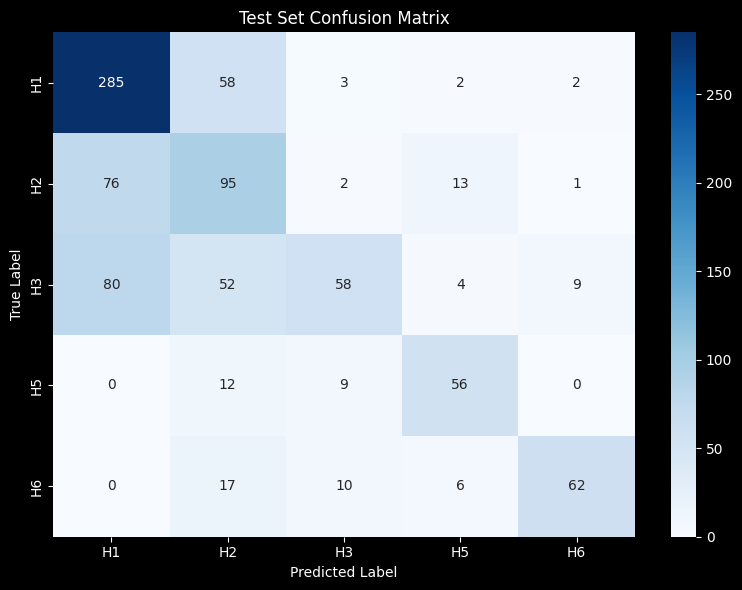

In [ ]:
# ===== CLASS DEFINITIONS =====
CLASS_NAMES = ['H1', 'H2', 'H3', 'H5', 'H6']  # DeFungi dataset classes

# ===== USAGE EXAMPLES =====
# Simple usage
results = full_evaluation(model, test_loader, criterion, device, CLASS_NAMES)

# # Custom workflow
# eval_data = evaluate_model(model, test_loader, criterion, device)

# metrics = compute_metrics(eval_data['predictions'], eval_data['true_labels'], CLASS_NAMES)

# # print_results(eval_data, metrics)
# plot_confusion_matrix(metrics['confusion_matrix'], metrics['class_names'])

🧪 Evaluating on test set...
📈 Test Results:
  • Accuracy: 0.6096
  • Loss: 0.9140
  • Total samples: 912


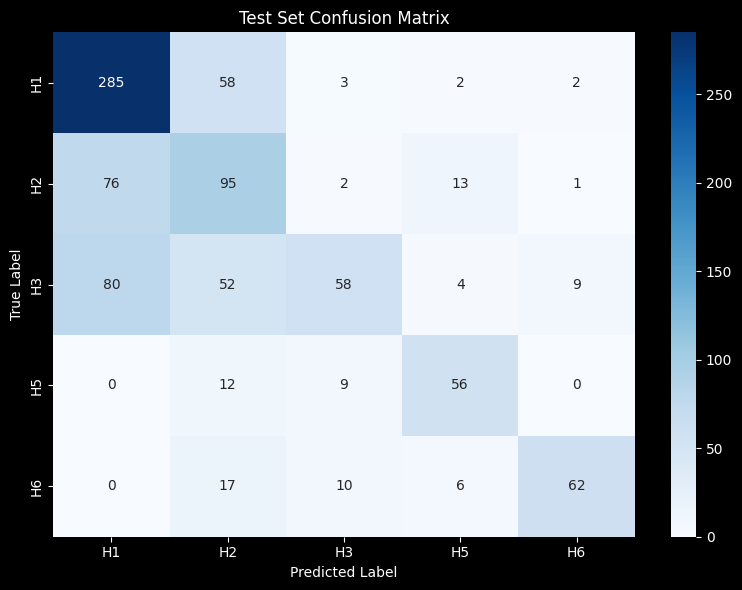

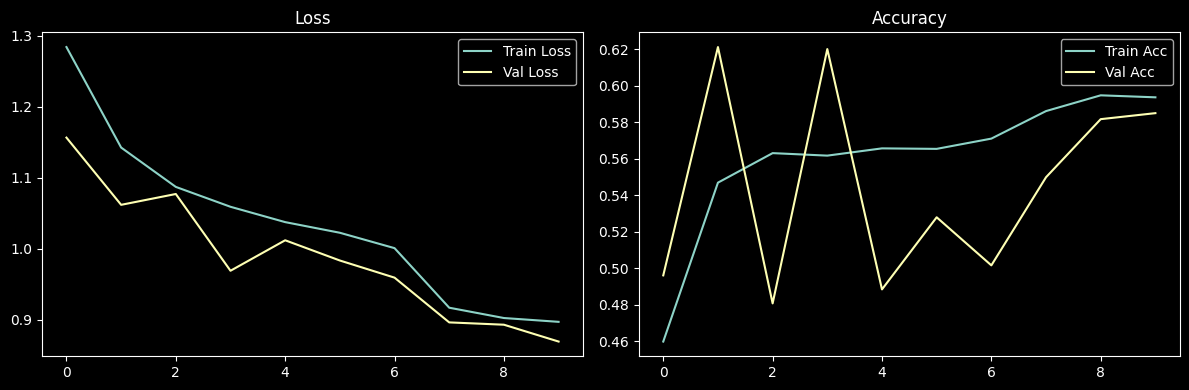

In [ ]:
# Load best model and evaluate
model.load_state_dict(torch.load("myconet_best.pth"))
results = full_evaluation(model, test_loader, criterion, device, CLASS_NAMES)

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(logs['train_loss'], label='Train Loss')
plt.plot(logs['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(logs['train_acc'], label='Train Acc')
plt.plot(logs['val_acc'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()